In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.ticker as mtick

In [2]:
df = pd.read_excel("peakiness.xlsx", skiprows=4, usecols= [0,1], index_col= "Time",parse_dates= True)
df

,Profile 1 (kW)
Time,
2017-01-26 00:00:00,3469.886230
2017-01-26 00:30:00,3252.681152
2017-01-26 01:00:00,3224.691895
2017-01-26 01:30:00,3198.656006
2017-01-26 02:00:00,3093.029785
2017-01-26 02:30:00,2942.820068
2017-01-26 03:00:00,3022.526855
2017-01-26 03:30:00,2978.788818
2017-01-26 04:00:00,2882.123047


In [4]:
df["Profile 2 (kW)"] = ""
df

,Profile 1 (kW),Profile 2 (kW)
Time,,
2017-01-26 00:00:00,3469.886230,
2017-01-26 00:30:00,3252.681152,
2017-01-26 01:00:00,3224.691895,
2017-01-26 01:30:00,3198.656006,
2017-01-26 02:00:00,3093.029785,
2017-01-26 02:30:00,2942.820068,
2017-01-26 03:00:00,3022.526855,
2017-01-26 03:30:00,2978.788818,
2017-01-26 04:00:00,2882.123047,


In [5]:
def make_load_profile(peakness_level):
    peakness = peakness_level
    profile1_min = df.min()[0]
    profile1_mean = df.mean()[0]
    profile1_peak = df.max()[0]
    print("Peakness:", peakness)
    print("Daily min (kW):", profile1_min)
    print("Daily mean (kW):", profile1_mean)
    print("Daily max (kW):", profile1_peak)
    
    for i in range(0,len(df)):
        if df.iloc[i,0] >= profile1_mean:
            df.iloc[i,1] = profile1_mean + (df.iloc[i,0] - profile1_mean) * peakness
            
        else:
            df.iloc[i,1] = profile1_mean - (profile1_mean - df.iloc[i,0]) * peakness
        

In [21]:
make_load_profile(0.5)

Peakness: 0.5
Daily min (kW): 2852.830078
Daily mean (kW): 5178.194625791667
Daily max (kW): 7054.0


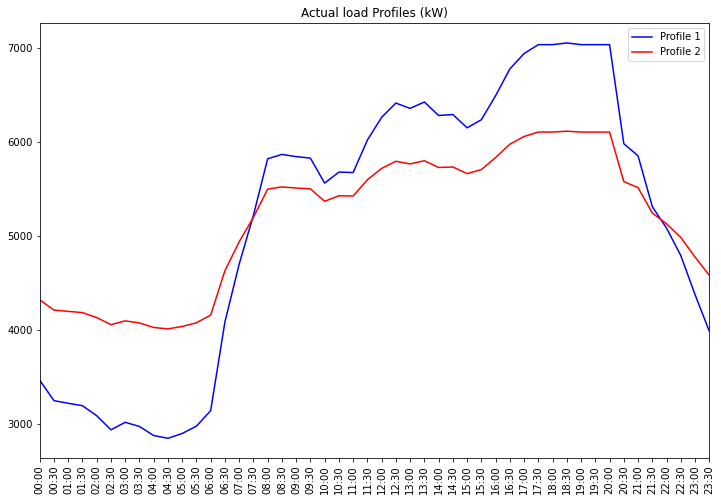

In [22]:
plt.figure(figsize = (12,8))

plt.plot(df.index, df["Profile 1 (kW)"], color = "blue", label = "Profile 1")
plt.plot(df.index, df["Profile 2 (kW)"], color = "red", label = "Profile 2")
plt.xlim([df.index[0], df.index[-1]])

plt.xticks(rotation=90)

plt.gca().xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(md.MinuteLocator(byminute=[0,30]))

plt.title("Actual load Profiles (kW)")
plt.legend()
plt.show()


In [17]:
df["Normalized Profile 1"] = " "
df["Normalized Profile 2"] = " "
df


,Profile 1 (kW),Profile 2 (kW),Normalized Profile 1,Normalized Profile 2
Time,,,,
2017-01-26 00:00:00,3469.886230,4324.04,,
2017-01-26 00:30:00,3252.681152,4215.44,,
2017-01-26 01:00:00,3224.691895,4201.44,,
2017-01-26 01:30:00,3198.656006,4188.43,,
2017-01-26 02:00:00,3093.029785,4135.61,,
2017-01-26 02:30:00,2942.820068,4060.51,,
2017-01-26 03:00:00,3022.526855,4100.36,,
2017-01-26 03:30:00,2978.788818,4078.49,,
2017-01-26 04:00:00,2882.123047,4030.16,,


In [19]:
df["Normalized Profile 1"] = df["Profile 1 (kW)"]/df["Profile 1 (kW)"].max()
df["Normalized Profile 2"] = df["Profile 2 (kW)"]/df["Profile 2 (kW)"].max()
df

,Profile 1 (kW),Profile 2 (kW),Normalized Profile 1,Normalized Profile 2
Time,,,,
2017-01-26 00:00:00,3469.886230,4324.04,0.491903,0.706993
2017-01-26 00:30:00,3252.681152,4215.44,0.461112,0.689237
2017-01-26 01:00:00,3224.691895,4201.44,0.457144,0.686948
2017-01-26 01:30:00,3198.656006,4188.43,0.453453,0.68482
2017-01-26 02:00:00,3093.029785,4135.61,0.438479,0.676185
2017-01-26 02:30:00,2942.820068,4060.51,0.417185,0.663905
2017-01-26 03:00:00,3022.526855,4100.36,0.428484,0.670421
2017-01-26 03:30:00,2978.788818,4078.49,0.422284,0.666845
2017-01-26 04:00:00,2882.123047,4030.16,0.408580,0.658943


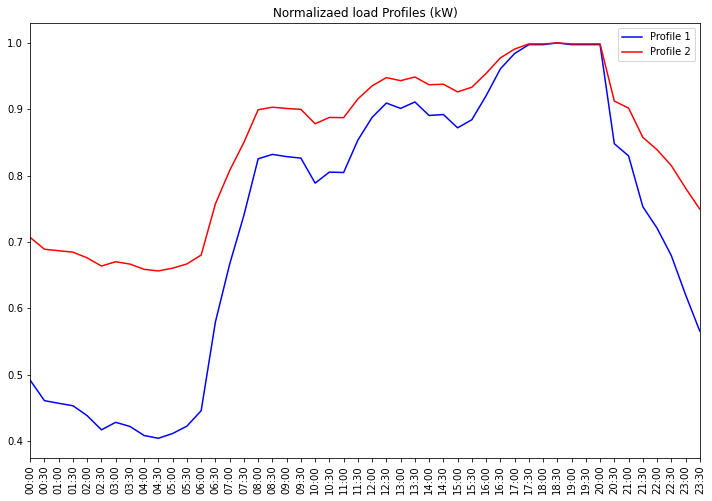

In [20]:
plt.figure(figsize = (12,8))

plt.plot(df.index, df["Normalized Profile 1"], color = "blue", label = "Profile 1")
plt.plot(df.index, df["Normalized Profile 2"], color = "red", label = "Profile 2")

plt.xlim([df.index[0], df.index[-1]])

plt.xticks(rotation=90)

plt.gca().xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(md.MinuteLocator(byminute=[0,30]))

plt.title("Normalizaed load Profiles (kW)")
plt.legend()
plt.show()